In [1]:
import numpy as np

# Mandelbrotmenge 
bearbeitet von Carolin Steger

<hr>

Die Mandelbrotmenge ist eine Menge der komplexen Zahlen, die nach Benoît Mandelbrot bennant ist, welcher 1977 die Mandelbrotmenge visualisierte. Diese Menge gehört zu den Fraktalen, dies ist eine geometrische Struktur, die durch unendliche Selbstähnlichkeit und Rekursion gekennzeichnet ist. Dargestellt wird sie in einer komplexen Ebene, wobei die x-Achse dem realen Teil entspricht und die y-Achse dem Imaginärteil. Zu jedem Punkt der komplexen Menge kann man eindeutig sagen ob dieser zur Mandelbrotmenge gehört oder nicht. 


### Wie überprüft man ob ein Punkt zur Mandelbrotmenge gehört?
1. Gewählt wird ein Punkt C aus der komplexen Ebene: $C = x + i * y$
   - dabei ist $x$ der reale Teil
   - und $i * y$ der Imaginärteil
<br></br>
2. Des weiteren wird eine rekursiv Folge definiert: $Z_n = Z_{n-1}^2 + C$
   mit:
   - $Z_0 = 0$
   - $Z_1 = Z_0^2 + C = C$
   - $Z_2 = Z_1^2 + C$
   - $Z_3 = Z_2^2 + C$
   - usw.
<br></br>
3. Der Startwert gehört dann zur Mandelbrotmenge, wenn die Folge beschränkt ist.

Nun berechnen wir für einfache Startwerte die ersten Elemente der rekusiven Folge:
   - **C = 0:** alle Elemente der Folge haben den Wert 0
   - **C = 1:**
       - $Z_0 = 0$
       - $Z_1 = 0^2 + 1 = 1$
       - $Z_2 = 1^2 + 1 = 2$
       - $Z_3 = 2^2 + 1 = 5$
       - $Z_4 = 5^2 + 1 = 26$
   - **C = -1:**
       - $Z_0 = 0$
       - $Z_1 = 0^2 - 1 = -1$
       - $Z_2 = (-1)^2 -1 = 0$
       - $Z_3 = 0^2 - 1 = -1$

Nun wollen wir die hier berechneten Werte mithilfe von SageMath überprüfen.

In [2]:
def z(c, n):
    return 0 if n==0 else z(c, n-1)**2 + c

In [3]:
[z(0, n) for n in range (10)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [4]:
[z(1, n) for n in range (10)]

[0,
 1,
 2,
 5,
 26,
 677,
 458330,
 210066388901,
 44127887745906175987802,
 1947270476915296449559703445493848930452791205]

In [5]:
[z(-1, n) for n in range (10)]

[0, -1, 0, -1, 0, -1, 0, -1, 0, -1]

Für die gewählten Startwerte erhalten wir unterschiedliche Ergebnisse: 
- Beim Startwert 0 haben wir eine konstante Folge
- Beim Startwert 1 haben wir eine Folge die divergiert
- Beim Startwert -1 haben wir eine alternierende Folge, zwischen den Werten -1, 0


Für die 3 angewandten Startwerte erhalten wir sehr unterschiedliche Ergebnisse. Jetzt stellen wir uns die Frage, wann die Folge beschränkt ist und der Startwert somit zu der Mandelbrotmenge gehört. Eine Folge gilt dann als beschränkt, wenn alle Folgenwerte einen Abstand, zum Nullpunkt haben, der kleiner oder gleich 2 ist. Deshalb entseht bei 0 Iterationen ein Kreis mit dem Radius 2 um den Ursprung, dieser heißt Fluchtkreis. All diese Werte gehören zur Menge, da sie bei 0 Iterationen noch nicht größer als 2 sind. Die Iterationszahl, bei der der Startwert den Fluchtkreis verlässt, wird auch Fluchtnummer genannt.
Sobald ein Folgenwert den Fluchtkreis verlässt kann man mit Sicherheit sagen, dass die Folge divergiert. Dies werden wir anhand der nachfolgenen Abbildungen zeigen.

#### Fall 1: Der Startwert hat bereits einen größeren Abstand als 2 zum Nullpunkt

![Fall1](Fall1.JPG)

In der Skizze ist der Fluchtkreis mit Radius 2 in schwarz eingezeichnet. Der Startwert C liegt auf dem blauen Kreis etwas auserhalb des Fluchtkreises. Wendet man nun Z auf den Startwert an um den ersten Folgenwert zu bestimmen wird zuerst $C^2$ berechnet; dieser Punkt wird auf dem grünen Kreis liegen. Zu $C^2$ muss man nun noch den Startwert C addieren, der Folgenwert nach der ersten Iteration wird auf dem blauen Kreis um $C^2$ liegen. Dabei lässt sich beobachten, dass sich der Fluchtkreis nicht mit unserem Folgenwert schneidet. 

Wendet man die rekursive Formel nun erneut auf $Z_n$ an, dann werden sich die kommenden Folgenwert immer weiter vom Fluchtkreis entfernen bzw. nicht wieder in den Fluchtkreis zurückkehren. Die Folge divergiert.


#### Fall 2: Der Startwert ist innerhalb des Fluchtkreises, aber der Folgenwert $Z_n$ verlässt den Fluchtkreis
![Fall2](Fall2.JPG)

In der obigen Abbildung sieht man den Startwert C auf dem roten Kreis. Nach n Iterationen verlässt der Folgenwert den Fluchtkreis und $Z_n$ liegt auf dem blauen Kreis etwas außerhalb des Fluchtkreises. Um zu dem nächsten Folgenwert zu gelangen müssen wir zuerst $Z_n^2$ berechnen; dieser Punkt wird auf dem grünen Kreis liegen. Anschließend wird noch der Startwert C addiert, somit wird unser nächster Folgenwert auf dem roten Kreis um $Z_n^2$ liegen.

Wendet man die rekursive Formel nun erneut auf $Z_{n+1}$ an, dann werden sich die kommenden Folgenwert immer weiter vom Fluchtkreis entfernen. Auch hier divergiert die Folge.

Gehört ein Punkt zur Mandelbrotmenge, dann wird dieser schwarz gefärbt. Ansonsten wird der Punkt abhängig von der Fluchtnummer farbig angezeigt.

Im Anschluss ist ein Algorithmus implementiert, der die Mandelbrotmenge in Abhängigkeit der Iterationen plottet.

In [6]:
"""
    Generates and plots the Mandelbrot set for n iterations.

    Parameters:
    n: Number of iterations
    y_min: Minimum value of the y-axis
    y_max: Maximum value of the y-axis
    x_min: Minimum value of the x-axis
    x_max: Maximum value of the x-axis
"""


def mandelbrot(n, y_min = float(-1.4), y_max = float(1.4), x_min = float(-2.0), x_max = float(0.8)):

    resolution = int(200)

    # Create a grid of complex numbers, y represent the imaginary and x the real part of the complex number
    y, x = np.ogrid[y_min:y_max:complex(0, resolution), x_min:x_max:complex(0, resolution)]

    # Combine the x and y grids to the complex numbers z
    z = x + y * 1j
    c = z

    # Iterate z = z^2 + c, n times over the grid
    for i in range (n):
        z = z * z + c

    # if |z| <= 2 plot the point in black, else plot the point in white
    plot = matrix_plot((np.where(abs(z)<= 2, 1, 0)), title = f"Mandelbrot mit {n} Iterationen")
    
    return plot

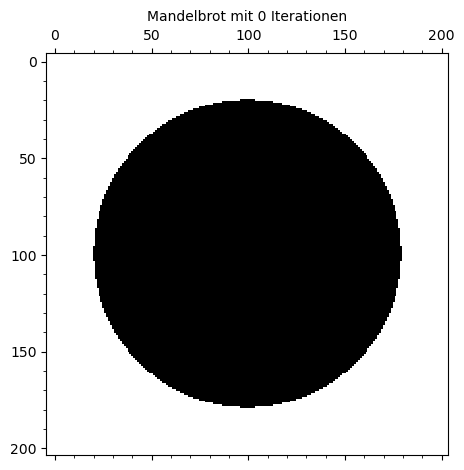

In [7]:
mandelbrot(0, float(-2.5), float(2.5), float(-2.5), float(2.5))

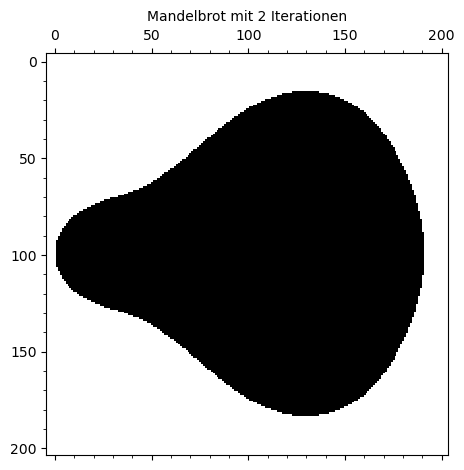

In [18]:
mandelbrot(2)

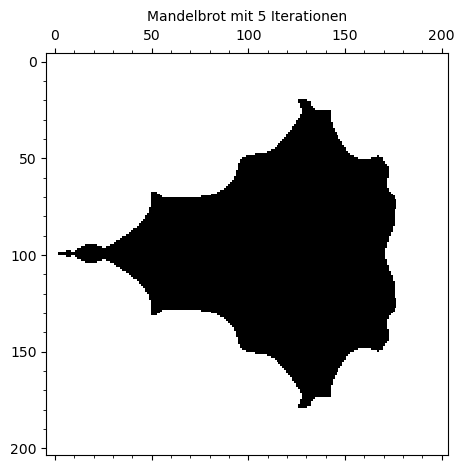

In [9]:
mandelbrot(5)

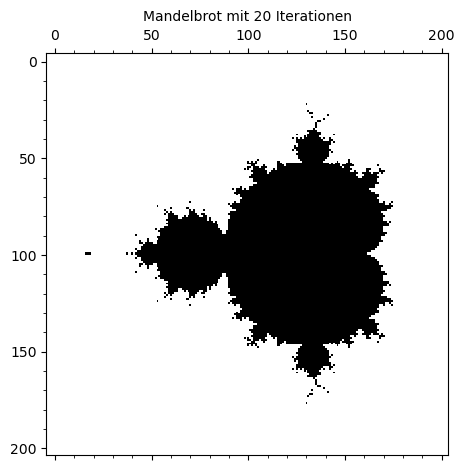

In [10]:
mandelbrot(20)

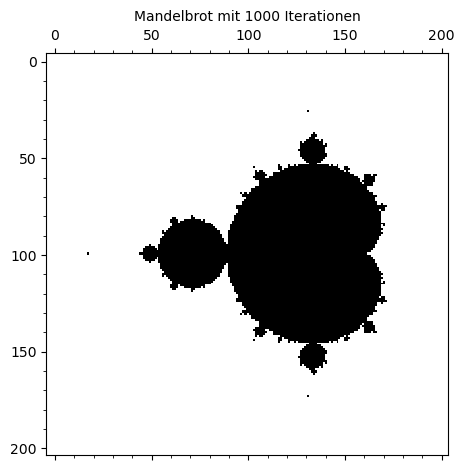

In [11]:
mandelbrot(1000)

Um die Veränderungen am Anfang genauer zu zeigen haben wir die Mandelbrotmenge für 0 bis 70 Iterationen animiert. Um so höher man die obere Grenze dabei setzt, umso länger wird die benötigte Rechenzeit. 

Animation with 70 frames
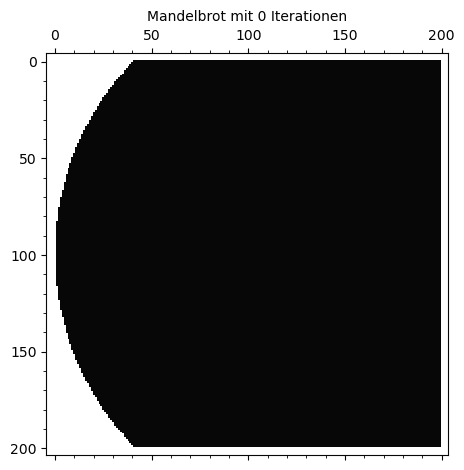

In [12]:
iterations = 70

plots = []

for i in range(iterations):
    plot = mandelbrot(i)
    plots.append(plot)

animation = animate(plots)
animation.show()
animation.gif(savefile="animation.gif")

Zur Vereinfachung und Übersichtlichkeit haben wir in diesem Code nur die Farben Schwarz und Weiß verwendet. 
Bei der Animation sieht man, je mehr Iterationen man pro Startwert festlegt, desto genauer wird die Mandelbrotmenge. Am Anfang der Animation sieht man große Veränderungen der Menge, zum Ende hin verändern sich nur noch die Randbereiche.


Nachfolgend sieht man einen Plot einer in SageMath vordefinierten Funktion, bei der man mit dem Plot interagiern kann und der auch die Fluchtnummern farbig darstellt.

In [19]:
mandelbrot_plot(interact=True)

interactive(children=(FloatSlider(value=0.0, description='Real center', max=1.0, min=-1.0, step=1e-05), FloatSlider(value=0.0, description='Imag center', max=1.0, min=-1.0, step=1e-05), FloatSlider(value=4.0, description='Width', max=4.0, min=1e-05, step=1e-05), IntSlider(value=500, description='Iterations', max=1000), IntSlider(value=500, description='Pixels', max=1000, min=10), IntSlider(value=1, description='Color sep', max=20, min=1), IntSlider(value=30, description='# Colors', min=1), ColorPicker(value='#ff6347', description='Base color'), Output()), _dom_classes=('widget-interact',))

In den Randgebieten sieht man sehr deutlich, wie sich die Strukturen immer wieder wiederholen.

### Fazit:
Die Mandelbrotmenge wird in der Komplexen Ebene dargestellt. Dabei lässt sich genau sagen, wenn die Folge mit den Startwert C beschränkt ist, dann gehört dieser Startwert zur Mandelbrotmenge. Ist die Folge nicht beschränkt, dann lasst sich mit Sicherheit sagen, dass sie divergieren wird. 

Die Menge gehört zu den Fraktalen, da sie durch Rekusion gebildet wird und man in den Randgebieten die sich widerholenden Struckturen in verschieden größen beobachten kann.

Je mehr Iterationen man festlegt, desto genau wird die Menge. Dabei sieht man vor allem am Anfang große Veränderungen.

<hr>

Im Folgenden sind noch Aufgaben zur Vertiefung der Mandelbrotmenge.

### Aufgaben:

1. Berechne für den Startwert C = 0,5 das zugehörige Z. Schreiben Sie dafür eine Funktion in Sagemath und lassen sie sich die ersten 10 Iterationen ausgeben. Entscheiden sie dann, ob der Startwert zur Mandelbrotmenge gehört oder nicht.

2. Warum entsteht bei 0 Iterationen ein Kreis mit Radius 2? Wie nennt man diesen Kreis?

3. Ist der Startwert -1 in der Mandelbrotmenge entahlten oder nicht? Prüfen Sie für die ersten 10 Iterationen.

### Lösungen:
1. Folgene Sagemath Funktion berechnet die Werte für Z. Danach kann man die Funktion mit dem Startwert 0,5 aufrufen und die Anzahl der Iterrationen angeben.

In [14]:
def z(c, n):
    return 0 if n==0 else z(c, n-1)**2 + c

In [15]:
[z(0.5, n) for n in range (10)]

[0,
 0.500000000000000,
 0.750000000000000,
 1.06250000000000,
 1.62890625000000,
 3.15333557128906,
 10.4435252251569,
 109.567219128489,
 12005.4755075503,
 1.44131442662390e8]

2. Ein Punkt gehört zur Menge, wenn die Folge beschränkt ist, also wenn alle Folgenwerte kleiner oder gleich 2 sind. Bei 0 Iterationen entsteht ein Kreis mit Radius 2, da innerhalb von diesem Kreis die Startwerte kleiner bzw. gleich 2 sind. Dieser Kreis wird auch Fluchtkreis genannt.

3. Wie oben bereits berechnet, entsteht bei dem Startwert -1 eine alternierende Folge mit den Werten 0 und -1. Das heißt die Folge wird nicht größer als 2 und der Startwert -1 gehört somit zu der Mandelbrotmenge. Zur Überprüfung kann erneut die in Aufgabe 1 geschriebene Methode aufgerufen und die ersten 10 Iterationen betrachtet werden.

In [16]:
[z(-1, n) for n in range (10)]

[0, -1, 0, -1, 0, -1, 0, -1, 0, -1]